In [4]:
# LIBRARIES IN NEED 
from glob import glob # for files 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm # for progress bar 
from PIL import Image # python imaging library 
import cv2
import tensorflow.keras
from tensorflow.keras.applications.vgg16 import preprocess_input,VGG16  # VGG16 - deep transfer learning model 
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Dense,BatchNormalization,Dropout,GlobalAveragePooling2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau   # To identify the best model 
from sklearn.metrics import classification_report
from keras.utils.vis_utils import plot_model
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Function to load images

def convert_image_to_dataset(file_location):
    label=0
    df=pd.DataFrame()
    for category in glob(file_location+'/*'):
        for file in tqdm(glob(category+'/*')):
            img_array=cv2.imread(file)
            img_array=cv2.resize(img_array,(224, 224))
            data=pd.DataFrame({'image':[img_array],'label':[label]})
            df=df.append(data)
        label+=1
    return df.sample(frac=1).reset_index(drop=True)

In [6]:
# output label to respective classes 

def inverse_classes(num):
    if num==0:
        return 'Glioma Tumor'
    elif num==1:
        return 'Meningioma Tumor'
    elif num==2:
        return 'No Tumor'
    else:
        return 'Pituitary Tumor'

TRAINING AND TESTING DATASET

In [9]:
train_data=convert_image_to_dataset('Training')
train_x=np.array(train_data.image.to_list())

100%|██████████| 827/827 [00:40<00:00, 20.64it/s]


In [11]:
test_data=convert_image_to_dataset('Testing')
test_x=np.array(test_data.image.to_list())

100%|██████████| 74/74 [00:03<00:00, 21.16it/s]


VISUALISATION OF THE DATASET

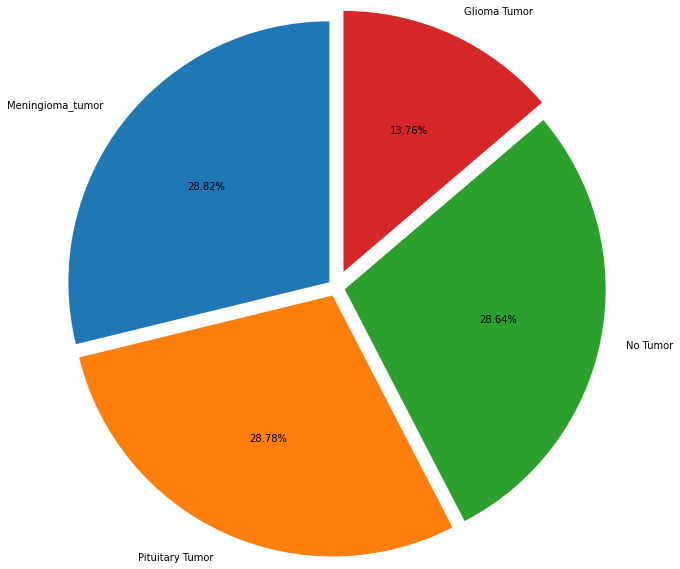

In [12]:
plt.pie(train_data.label.value_counts(),startangle=90,explode=[0.1,0.1,0.1,0.2],autopct='%0.2f%%',
        labels=['Meningioma_tumor', 'Pituitary Tumor', 'No Tumor', 'Glioma Tumor'],radius=3)
plt.show()

<BarContainer object of 4 artists>

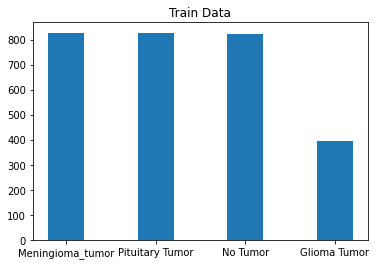

In [13]:
labels=['Meningioma_tumor', 'Pituitary Tumor', 'No Tumor', 'Glioma Tumor']
plt.title("Train Data")
plt.bar(x=labels,height =train_data.label.value_counts(),width = 0.4)



<BarContainer object of 4 artists>

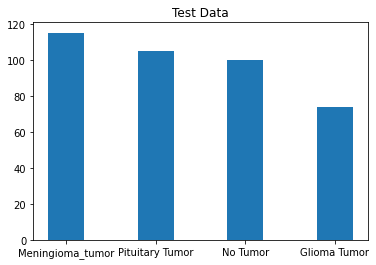

In [14]:
plt.title("Test Data")
plt.bar(x=labels,height =test_data.label.value_counts(),width = 0.4)

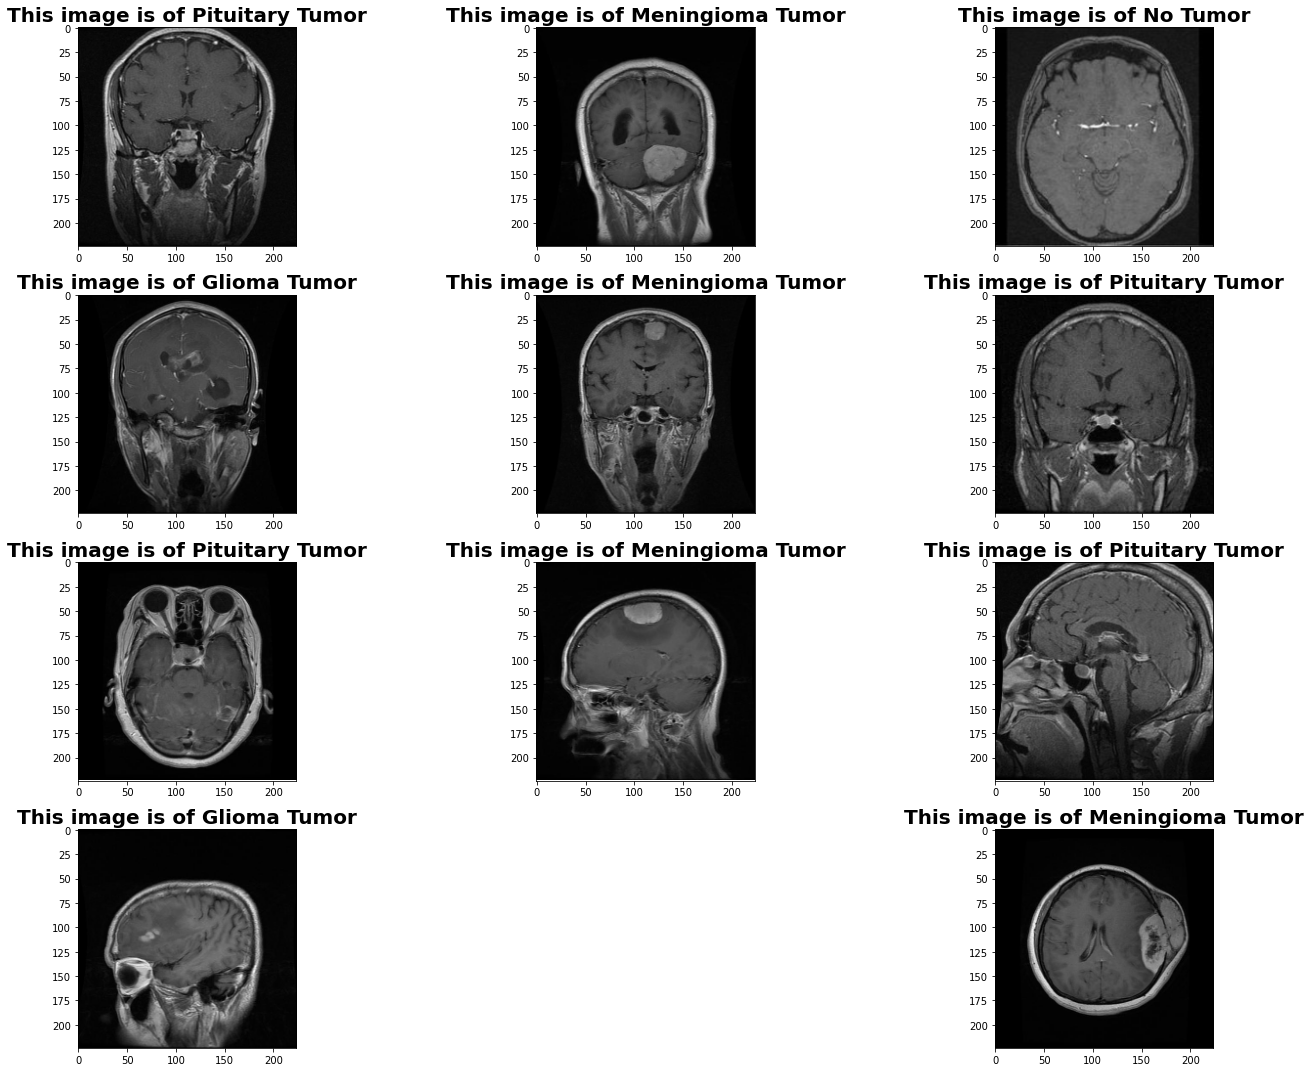

In [15]:
plt.figure(figsize=(20,15))
for i in range(12):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(2000)
    plt.title('This image is of {0}'.format(inverse_classes(train_data.label[index])),fontdict={'size':20,'weight':'bold'})
    plt.imshow(train_data.image[index])
    plt.tight_layout()

CALL BACKS

In [16]:
#CALL BACKS 
early_stop=EarlyStopping(patience=3)
reduceLR=ReduceLROnPlateau(patience=2)

CNN APPROACH FOR PREDICTING TUMOR 

In [17]:
model_cnn=Sequential()

model_cnn.add(Conv2D(128,(3,3),input_shape = (224,224,3)))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(BatchNormalization())

model_cnn.add(Conv2D(64,(3,3)))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(BatchNormalization())

model_cnn.add(Conv2D(32,(3,3)))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(BatchNormalization())
model_cnn.add(Flatten())

model_cnn.add(Dense(128,activation='relu'))
model_cnn.add(Dropout(0.2))

model_cnn.add(Dense(64,activation='relu'))

model_cnn.add(Dense(4,activation='softmax'))
model_cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

2022-11-09 14:01:01.220791: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-11-09 14:01:01.871180: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-09 14:01:01.871244: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (crsribro1): /proc/driver/nvidia/version does not exist
2022-11-09 14:01:01.872662: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-11-09 14:01:01.960634: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2593905000 Hz
2022-11-09 14:01:01.961563: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f29f8000b60 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-1

In [19]:
r1=model_cnn.fit(train_x,train_data.label,validation_split=0.1,epochs=20,callbacks=[reduceLR])

Epoch 1/20
81/81 [==============================] - 164s 2s/step - loss: 1.3558 - accuracy: 0.5738 - val_loss: 2.3054 - val_accuracy: 0.3031 - lr: 0.0010
Epoch 2/20
81/81 [==============================] - 159s 2s/step - loss: 0.7914 - accuracy: 0.6775 - val_loss: 0.8739 - val_accuracy: 0.6585 - lr: 0.0010
Epoch 3/20
81/81 [==============================] - 157s 2s/step - loss: 0.6770 - accuracy: 0.7232 - val_loss: 0.9657 - val_accuracy: 0.7073 - lr: 0.0010
Epoch 4/20
81/81 [==============================] - 157s 2s/step - loss: 0.5954 - accuracy: 0.7557 - val_loss: 1.6470 - val_accuracy: 0.4808 - lr: 0.0010
Epoch 5/20
81/81 [==============================] - 159s 2s/step - loss: 0.4309 - accuracy: 0.8165 - val_loss: 0.5820 - val_accuracy: 0.8014 - lr: 1.0000e-04
Epoch 6/20
81/81 [==============================] - 157s 2s/step - loss: 0.3604 - accuracy: 0.8417 -

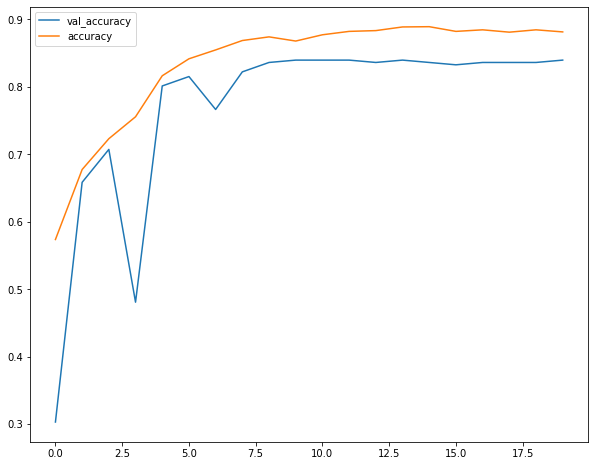

In [20]:
plt.figure(figsize=(10,8))
plt.plot(r1.history['val_accuracy'])
plt.plot(r1.history['accuracy'])
plt.legend(['val_accuracy','accuracy'])
plt.show()

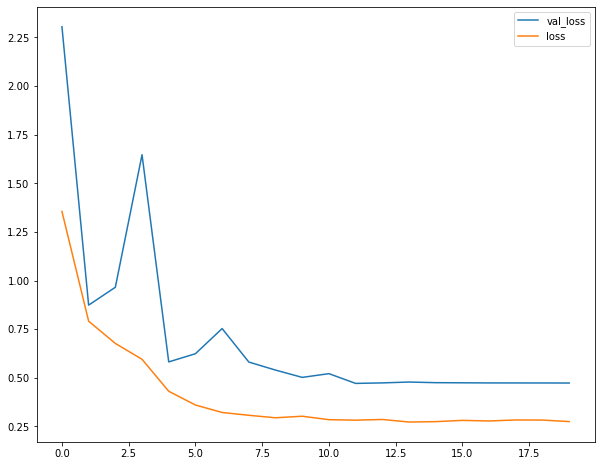

In [21]:
plt.figure(figsize=(10,8))
plt.plot(r1.history['val_loss'])
plt.plot(r1.history['loss'])
plt.legend(['val_loss','loss'])
plt.show()

In [22]:
# Predictions on Test Datasets using CNN model

test_pred=np.argmax(model_cnn.predict(test_x),axis=1)
print(classification_report(test_data.label,test_pred))

              precision    recall  f1-score   support

           0       0.58      0.14      0.23       100
           1       0.58      0.78      0.66       115
           2       0.57      0.85      0.68       105
           3       0.93      0.74      0.83        74

    accuracy                           0.63       394
   macro avg       0.67      0.63      0.60       394
weighted avg       0.64      0.63      0.59       394



DEEP TRANSFER LEARNING 

In [24]:
vgg_model = VGG16(weights='imagenet',include_top=False)
for layers in vgg_model.layers:
    layers.trainable=False
x=vgg_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.15)(x)
output=Dense(4,activation='softmax')(x)
model2=Model(inputs=vgg_model.input,outputs=output)
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

58892288/58889256 [==============================] - 0s 0us/step


In [37]:
r2=model2.fit(train_x,train_data.label,validation_split=0.1,epochs=20,callbacks=[early_stop,reduceLR])

Epoch 1/20
81/81 [==============================] - 183s 2s/step - loss: 0.1293 - accuracy: 0.9597 - val_loss: 0.2642 - val_accuracy: 0.9024 - lr: 1.0000e-05
Epoch 2/20
81/81 [==============================] - 182s 2s/step - loss: 0.1326 - accuracy: 0.9570 - val_loss: 0.2652 - val_accuracy: 0.9024 - lr: 1.0000e-05
Epoch 3/20
81/81 [==============================] - 182s 2s/step - loss: 0.1342 - accuracy: 0.9597 - val_loss: 0.2643 - val_accuracy: 0.8990 - lr: 1.0000e-05
Epoch 4/20
81/81 [==============================] - 182s 2s/step - loss: 0.1327 - accuracy: 0.9586 - val_loss: 0.2642 - val_accuracy: 0.8990 - lr: 1.0000e-06
Epoch 5/20
81/81 [==============================] - 182s 2s/step - loss: 0.1340 - accuracy: 0.9566 - val_loss: 0.2641 - val_accuracy: 0.8990 - lr: 1.0000e-06
Epoch 6/20
81/81 [==============================] - 182s 2s/step - loss: 0.1263 - accuracy: 0.9624 -

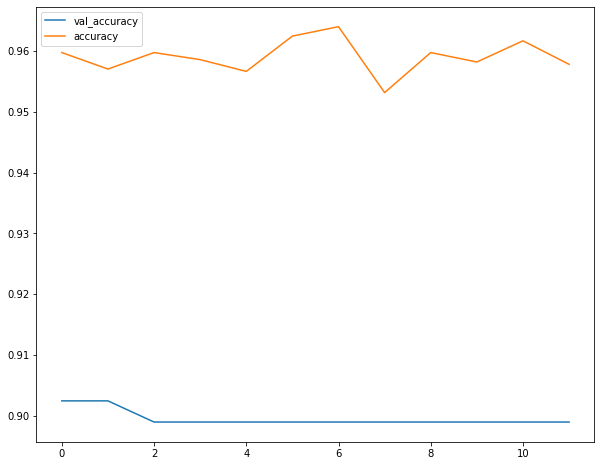

In [38]:
plt.figure(figsize=(10,8))
plt.plot(r2.history['val_accuracy'])
plt.plot(r2.history['accuracy'])
plt.legend(['val_accuracy','accuracy'])
plt.show()

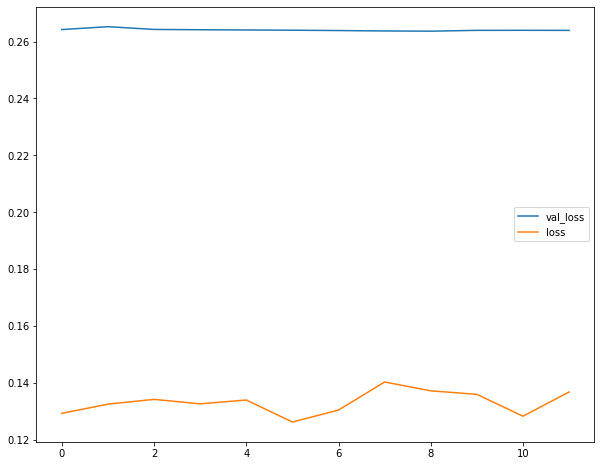

In [39]:
plt.figure(figsize=(10,8))
plt.plot(r2.history['val_loss'])
plt.plot(r2.history['loss'])
plt.legend(['val_loss','loss'])
plt.show()

In [40]:
# Predictions on Test Datasets using VGG16 model

test_pred_transfer=np.argmax(model2.predict(test_x),axis=1)
print(classification_report(test_data.label,test_pred_transfer))

              precision    recall  f1-score   support

           0       0.93      0.27      0.42       100
           1       0.64      0.97      0.77       115
           2       0.78      0.92      0.85       105
           3       0.87      0.80      0.83        74

    accuracy                           0.75       394
   macro avg       0.81      0.74      0.72       394
weighted avg       0.80      0.75      0.71       394



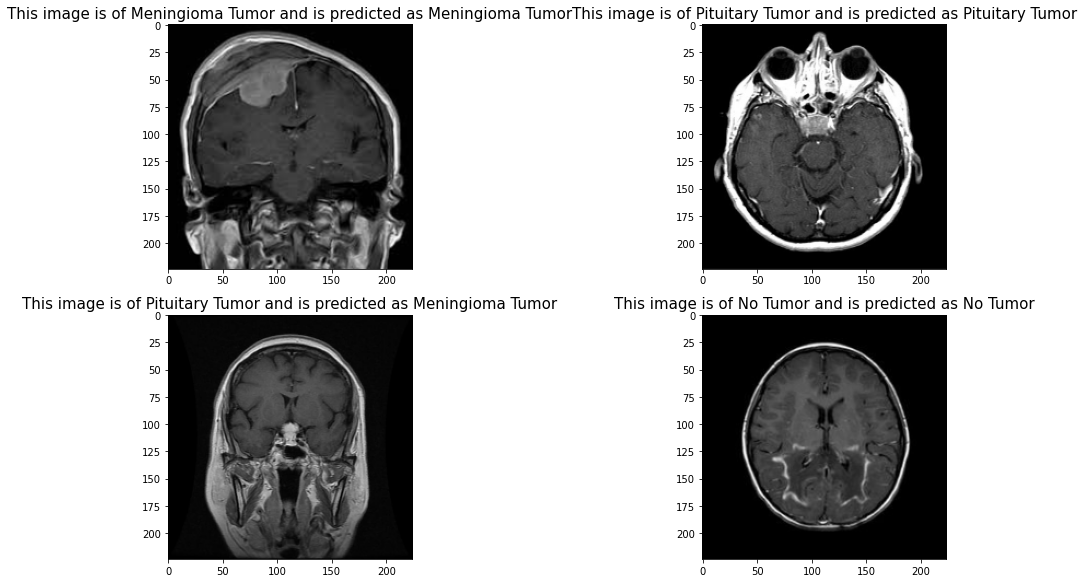

In [41]:
plt.figure(figsize=(15,12))
for i in range(4):
    plt.subplot(3,2,(i%12)+1)
    index=np.random.randint(200)
    pred_class=inverse_classes(np.argmax(model2.predict(np.reshape(test_x[index],(-1,224,224,3))),axis=1))
    plt.title('This image is of {0} and is predicted as {1}'.format(inverse_classes(test_data.label[index]),pred_class),
              fontdict={'size':15})
    plt.imshow(test_x[index])
    plt.tight_layout()

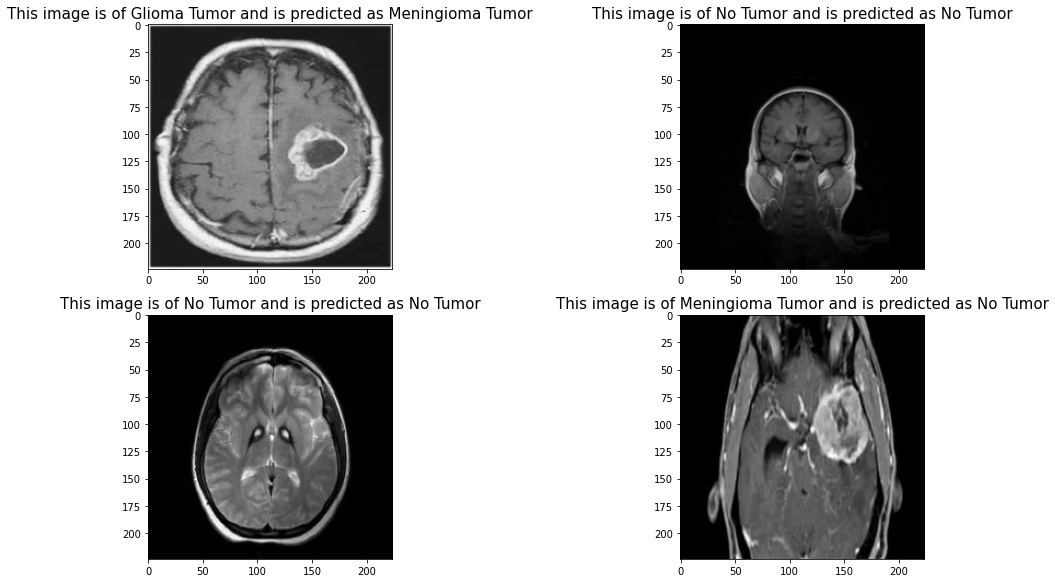

In [32]:
# Prediction using CNN model

plt.figure(figsize=(15,12))
for i in range(4):
    plt.subplot(3,2,(i%12)+1)
    index=np.random.randint(200)
    pred_class=inverse_classes(np.argmax(model_cnn.predict(np.reshape(test_x[index],(-1,224,224,3))),axis=1))
    plt.title('This image is of {0} and is predicted as {1}'.format(inverse_classes(test_data.label[index]),pred_class),
              fontdict={'size':15})
    plt.imshow(test_x[index])
    plt.tight_layout()
